IMPORTANT, READ README OR JUST DOWNLOAD the CIFAR-10 TRAINING data

In [50]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
from tensorflow.keras import regularizers
import seaborn as sns
import pandas as pd

# Images and dataset exploration

Let's see what the images look like

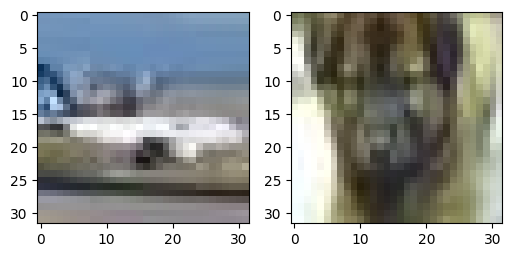

In [51]:
image1 = plt.imread('C:/Users/USER/Documents/data/test/airplane/0007.jpg')/255
image2 = plt.imread('C:/Users/USER/Documents/data/test/dog/0004.jpg')/255
fig, ax = plt.subplots(1,2, figsize=(6,4))
ax[0].imshow(image1)
ax[1].imshow(image2);

We are gonna use a library which allow us and is specialized with Image processing for machine learning.\
It allows us to have a dataFrame without loading all the entire images and lagging the computer

In [52]:
directory = "C:/Users/USER/Documents/data"
data_dir = pathlib.Path(directory).with_suffix('')
train_data_dir = data_dir / "train"
test_data_dir = data_dir / "test"

Count the images to see if everything is ok

50000


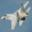

In [53]:
image_count = len(list(train_data_dir.glob('*/*.jpg')))
print(image_count)
airplane = list(data_dir.glob('test/airplane/*'))
PIL.Image.open(str(airplane[1]))

Define variables

In [54]:
batch_size = 64
img_height = 32
img_width = 32

# Preprocessing

## Data splitting

Split the data from the folders

In [55]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  seed=5,
  image_size=(img_height, img_width))

Found 50000 files belonging to 10 classes.


In [56]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=5,
  image_size=(img_height, img_width))

Found 10000 files belonging to 10 classes.


In [57]:
class_names = train_ds.class_names
print(class_names)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


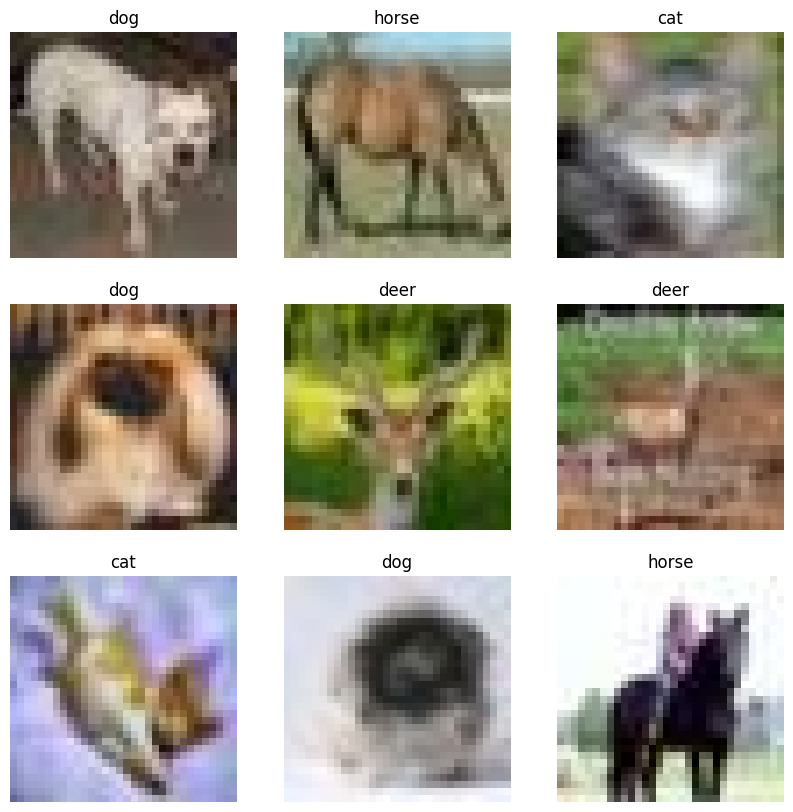

In [58]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Data scaling and normalization

Make all the values from 0 to 1

In [59]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Posprocessing

## Modeling

Ok, now its time to create the first model:\
A simplistic model, the most classic Neural Network.

<img src="nnsimple.png" alt="Simple NeuralNetwork" width="500" height="auto">

In [60]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(1024*3, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')    
    ])

In [61]:
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.fit(
    normalized_ds,
    validation_data=normalized_val,
    epochs=10
)

Epoch 1/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8129 - accuracy: 0.3541 - val_loss: 1.7855 - val_accuracy: 0.3623
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6242 - accuracy: 0.4284 - val_loss: 1.6266 - val_accuracy: 0.4157
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5425 - accuracy: 0.4554 - val_loss: 1.6012 - val_accuracy: 0.4238
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4812 - accuracy: 0.4783 - val_loss: 1.5850 - val_accuracy: 0.4448
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4338 - accuracy: 0.4949 - val_loss: 1.5483 - val_accuracy: 0.4448
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3911 - accuracy: 0.5103 - val_loss: 1.4574 - val_accuracy: 0.4845
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3508 - accuracy: 0.5251 - val_loss: 1.5021 - val_ac

Now, a more complex model, convultional neural network

In [95]:
num_classes = 10
modelCNN = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [98]:
modelCNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [100]:
modelCNN.fit(
    normalized_ds,
    epochs=15,
    validation_data=normalized_val
)

Epoch 1/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9250 - accuracy: 0.6827 - val_loss: 0.9494 - val_accuracy: 0.6725
Epoch 2/15
1563/1563 [==============================] - 15s 9ms/step - loss: 0.9104 - accuracy: 0.6886 - val_loss: 0.9936 - val_accuracy: 0.6594
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8977 - accuracy: 0.6929 - val_loss: 0.9927 - val_accuracy: 0.6652
Epoch 4/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8858 - accuracy: 0.6976 - val_loss: 0.9542 - val_accuracy: 0.6810
Epoch 5/15
1563/1563 [==============================] - 18s 11ms/step - loss: 0.8689 - accuracy: 0.7029 - val_loss: 0.9690 - val_accuracy: 0.6751
Epoch 6/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8646 - accuracy: 0.7032 - val_loss: 0.9996 - val_accuracy: 0.6666
Epoch 7/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8462 - accuracy: 0.7103 - val_loss: 0.9856 - v

There is a obvious difference between them. CNN is far better against a NN. So, lets use the CNN.

## Testing

Ok, reading the predicts of the models are really a headache, so it's recommended to create a function that takes the pain for us.\
Just a simple mapping method in a function, receives the vector input, search the max value index and then from the classes return the highest.

In [66]:
def map_label(input):
    label = np.argmax(input)
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    
    if label < 0 or label >= len(class_labels):
        return "Unknown"
    
    return class_labels[label]

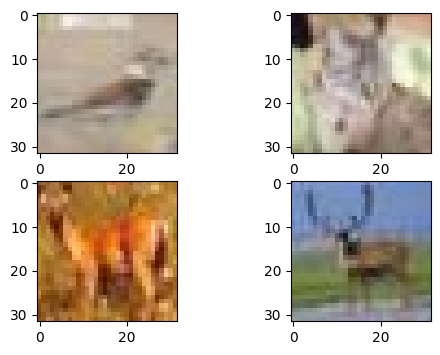

In [72]:
test_image1 = plt.imread(directory + '/test/bird/0004.jpg')/255
test_image2 = plt.imread(directory + '/test/cat/0001.jpg')/255
test_image3 = plt.imread(directory + '/test/deer/0008.jpg')/255
test_image4 = plt.imread(directory + '/test/deer/0011.jpg')/255
fig, ax = plt.subplots(2,2, figsize=(6,4))
ax[0,0].imshow(test_image1)
ax[0,1].imshow(test_image2)
ax[1,0].imshow(test_image3)
ax[1,1].imshow(test_image4)

In [101]:
map_label(modelCNN.predict(test_image1[tf.newaxis, ...]))

1/1 [==============================] - 0s 83ms/step


'airplane'

In [102]:
map_label(modelCNN.predict(test_image2[tf.newaxis, ...]))

1/1 [==============================] - 0s 21ms/step


'cat'

In [103]:
map_label(modelCNN.predict(test_image3[tf.newaxis, ...]))

1/1 [==============================] - 0s 34ms/step


'deer'

In [104]:
map_label(modelCNN.predict(test_image3[tf.newaxis, ...]))

1/1 [==============================] - 0s 20ms/step


'deer'

In [105]:
results = modelCNN.evaluate(normalized_val, verbose=0)
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Accuracy: 68.04%


In [106]:
image_batch, labels_batch = next(iter(normalized_val))

1/1 [==============================] - 0s 21ms/step
bird


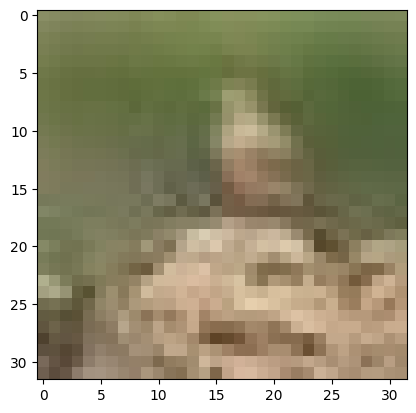

In [109]:
i = 5
plt.imshow(image_batch[i])
print(map_label(modelCNN.predict(image_batch[i][tf.newaxis, ...])))

In [110]:
from sklearn.metrics import confusion_matrix, classification_report
predictions = np.argmax(model.predict(image_batch), axis=1)
cm = confusion_matrix(labels_batch, predictions)
clr = classification_report(labels_batch, predictions, zero_division=0)
print(clr)

1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       1.00      0.50      0.67         2
           2       0.50      0.40      0.44         5
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           6       0.71      0.83      0.77         6
           7       1.00      1.00      1.00         2
           8       0.50      0.50      0.50         2
           9       0.57      1.00      0.73         4

    accuracy                           0.59        32
   macro avg       0.56      0.60      0.55        32
weighted avg       0.55      0.59      0.55        32



In [127]:
sum = 0
i = 0
print(labels_batch.numpy(), predictions)
for predict in predictions:
    if predict == labels_batch.numpy()[i]:
        sum += 1
    i +=1
print(f"{sum/len(predictions)*100}%")

[5 4 6 1 4 2 2 0 8 2 3 0 6 5 6 5 1 6 2 9 2 4 3 9 8 9 6 6 7 5 9 7] [0 6 5 9 2 6 3 0 8 2 3 8 6 9 6 9 1 6 3 9 2 2 3 9 0 9 6 6 7 5 9 7]
59.375%


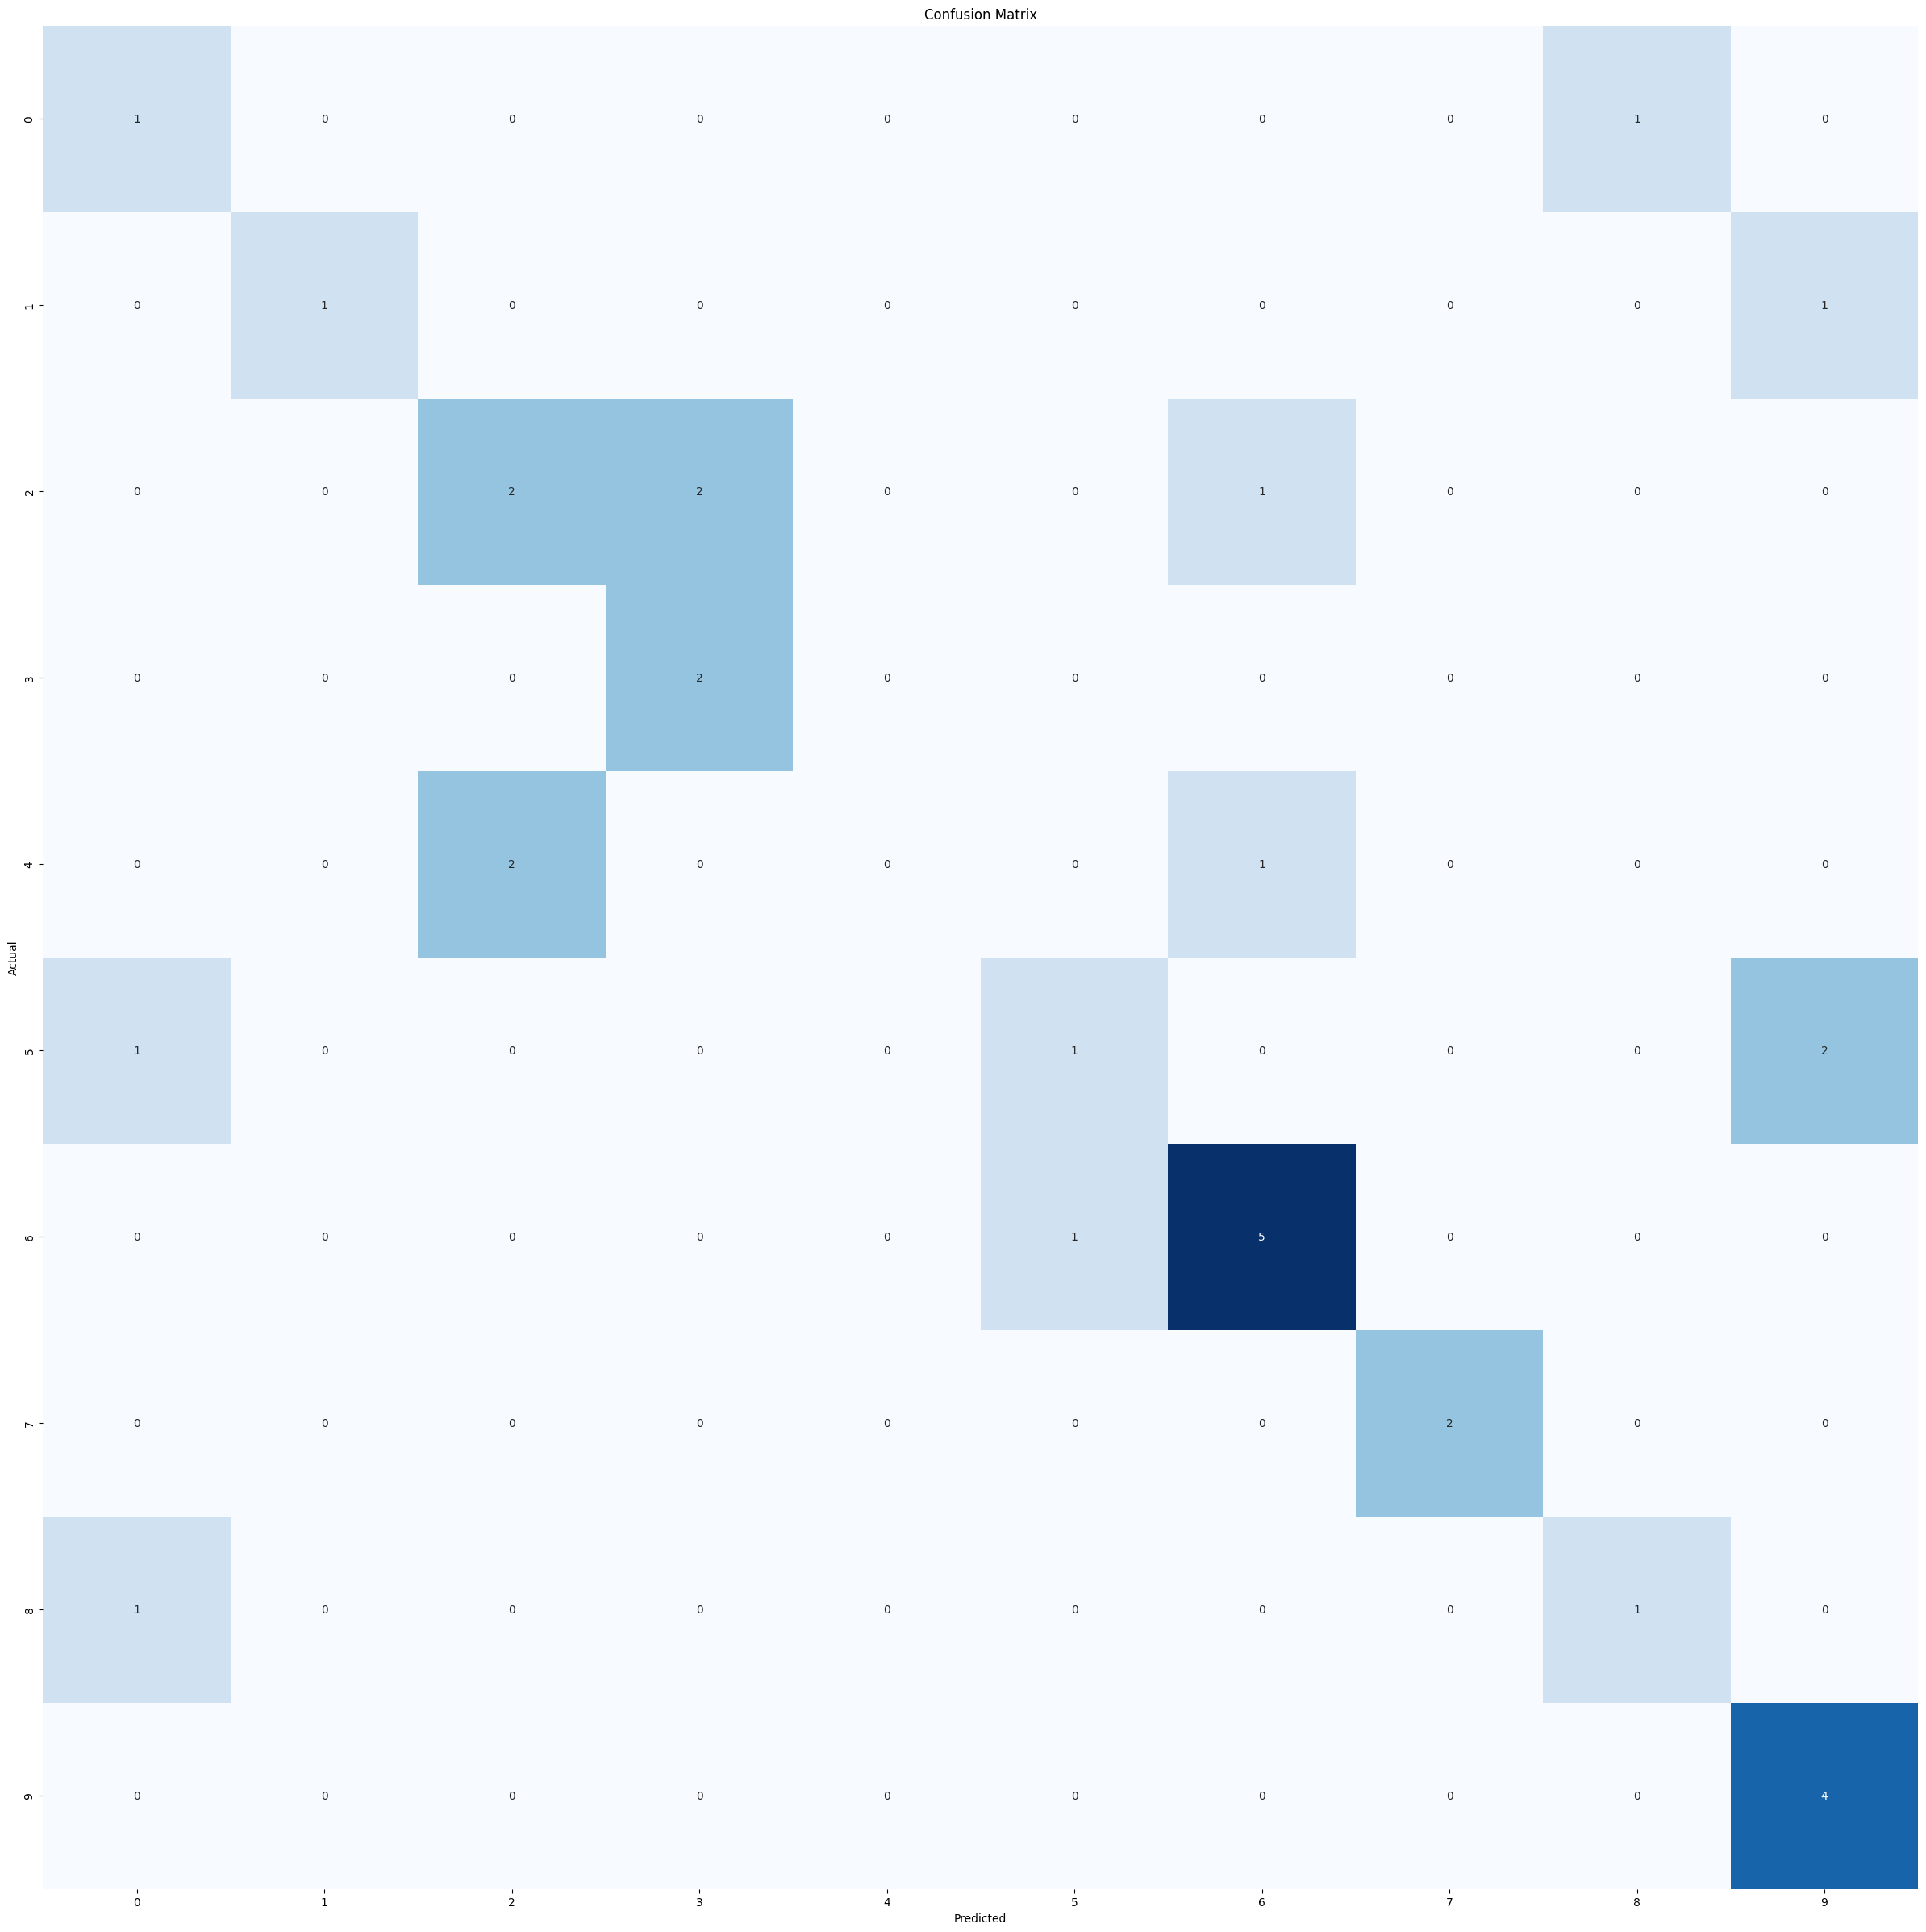

In [128]:
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 22ms/step


'frog'

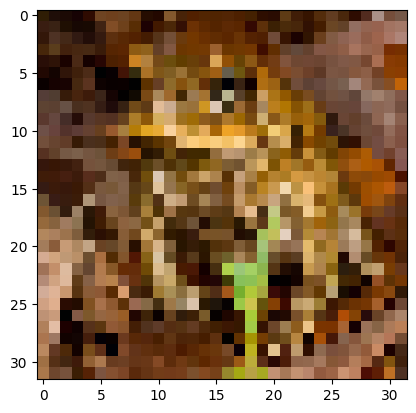

In [129]:
test_image5 = tf.image.resize(plt.imread('sapo.jpg')/255, [32,32])
plt.imshow(test_image5)
map_label(modelCNN.predict(test_image5[tf.newaxis, ...]))

1/1 [==============================] - 0s 21ms/step


'dog'

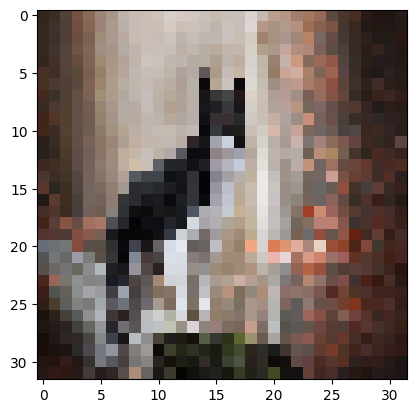

In [130]:
test_image6 = tf.image.resize(plt.imread('dog.jpg')/255, [32,32])
plt.imshow(test_image6)
map_label(modelCNN.predict(test_image6[tf.newaxis, ...]))

1/1 [==============================] - 0s 21ms/step


'frog'

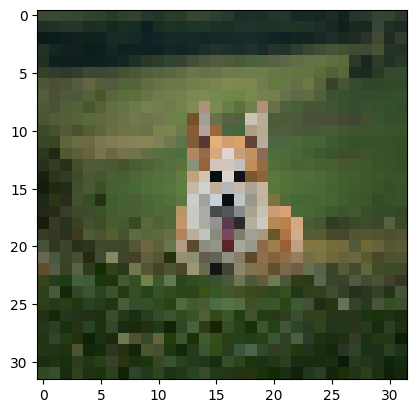

In [131]:
test_image7 = tf.image.resize(plt.imread('dog2.jpg')/255, [32,32])
plt.imshow(test_image7)
map_label(modelCNN.predict(test_image7[tf.newaxis, ...]))

Since, it is my first CNN and work alone, without much training data and techniques, I think it is a pretty good number to achieve around 40% of efficiency.\
Also is important to notice that the CNN misses around near objects, for example, a cat and dog from far, an airplane and a boat.